In [5]:
from sklearn import svm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [7]:
# Loading Datasets. 
toy = pd.read_csv("toy_svm.csv")
toy.head(5)

,x,y,label
0,8.525,11.10,0
1,10.725,12.45,0
2,10.525,10.35,0
3,7.575,7.25,0
4,8.475,8.45,0


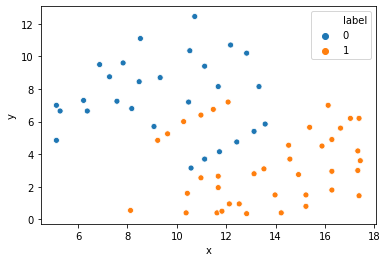

In [8]:
# Visualize the data. 
naive_ax = sns.scatterplot(x="x", y="y", hue="label", data=toy)

In [9]:
# Preparing Toy Training Features and Labels. 
X = toy[["x", "y"]].to_numpy()
y = toy["label"].to_numpy()

## Training Using All Data Points

In [13]:
clf_original = svm.SVC(kernel='linear')
clf_original.fit(X, y)
# Extracting the support vectors
sv = clf_original.support_vectors_

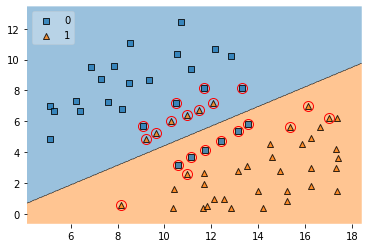

In [32]:
svm_decision = plot_decision_regions(X=X, y=y, clf=clf_original, legend=2)
svm_decision.plot(sv[:,0], sv[:,1], "or", mfc='none', markersize=10) # Plot support vectors

## Training Using Only the Support Vectors

In [43]:
# Preparing the training data by left joining the original dataset to the support vector dataset. 
toy_sv = pd.DataFrame({"x": sv[:,0], "y": sv[:,1]})
toy_sv_df = pd.merge(left=toy_sv, right=toy, how="left", on=["x", "y"])
print("Checking length of merged dataset: {}".format(len(sv) == toy_sv_df.shape[0]))
toy_sv_df.head(2)

Checking length of merged dataset: True


,x,y,label
0,13.325,8.15,0
1,11.675,8.15,0


In [46]:
sv_X = toy_sv_df[["x", "y"]].to_numpy()
sv_y = toy_sv_df["label"].to_numpy()
clf_sv = svm.SVC(kernel='linear')
clf_sv.fit(sv_X, sv_y)
sv_2 = clf_sv.support_vectors_

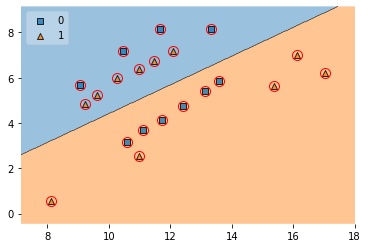

In [47]:
svm_decision_2 = plot_decision_regions(X=sv_X, y=sv_y, clf=clf_sv, legend=2)
svm_decision_2.plot(sv_2[:,0], sv_2[:,1], "or", mfc='none', markersize=10)